In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import os 
import seaborn as sns

sys.path.append('../')
import utils.helper_signals as helper_signals

In [5]:
vehicle_names = ["SEB880", "SEB882", "SEB883", "SEB885", "SEB888", "SEB889"]
#vehicle_names = ["SEB880"]

PATH_TO_MF4 = "../Processed_data_new/01_Mf4_Extracted"

def load_csv_to_dic(path, v_names, ext="_eso.csv") -> dict:
    """ Return: dic with v_name as key and dataframe as value """
    dic = {}
    for vn in v_names:
        dic[vn] = pd.read_csv(os.path.join(path, vn + ext), parse_dates=['datetime'])
    return dic

dfEsoDic = load_csv_to_dic(path="../Processed_data_new/01_Eso_Extracted", v_names=vehicle_names, ext="_extracted_eso.csv")
dfMf4Dic = load_csv_to_dic(path="../Processed_data_new/01_Mf4_Extracted", v_names=vehicle_names, ext="_extracted_mf4.csv")
dfMergedDic = load_csv_to_dic(path="../Processed_data_new/04_Merged", v_names=vehicle_names, ext="_merged.csv")

dfEso = pd.DataFrame()
dfMf4 = pd.DataFrame()
dfMerged = pd.DataFrame()
for vehicle in vehicle_names:
    dfEsoDic[vehicle]["vehicle"] = vehicle
    dfEso = pd.concat([dfEso, dfEsoDic[vehicle]])
    dfMf4Dic[vehicle]["vehicle"] = vehicle
    dfMf4 = pd.concat([dfMf4, dfMf4Dic[vehicle]])
    dfMergedDic[vehicle]["vehicle"] = vehicle
    dfMerged = pd.concat([dfMerged, dfMergedDic[vehicle]])
    

/var/folders/66/86s66dd95nx0972mbj4kyl940000gn/T/ipykernel_25728/1359581116.py:10: DtypeWarning: Columns (14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dic[vn] = pd.read_csv(os.path.join(path, vn + ext), parse_dates=['datetime'])
/var/folders/66/86s66dd95nx0972mbj4kyl940000gn/T/ipykernel_25728/1359581116.py:10: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dic[vn] = pd.read_csv(os.path.join(path, vn + ext), parse_dates=['datetime'])
/var/folders/66/86s66dd95nx0972mbj4kyl940000gn/T/ipykernel_25728/1359581116.py:10: DtypeWarning: Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dic[vn] = pd.read_csv(os.path.join(path, vn + ext), parse_dates=['datetime'])
/var/folders/66/86s66dd95nx0972mbj4kyl940000gn/T/ipykernel_25728/1359581116.py:10: DtypeWarning: Columns (16,28,29,30,31) have mixed types. Specify dtype option on import or set low_memor

In [158]:
dfMerged.keys()

Index(['index', 'avg_irradiation', 'steering_speed', 'temperature_out', 'hour',
       'month', 'odometer', 'light_sensor_rear', 'light_sensor_front',
       'temperature_in', 'KBI_speed', 'soc', 'ESP_speed', 'latitude',
       'longitude', 'seatbelt_codriver', 'seatbelt_rear_l', 'seatbelt_rear_m',
       'seatbelt_rear_r', 'CHA_ESP_drive_mode', 'CHA_MO_drive_mode',
       'rain_sensor', 'street_category', 'kickdown', 'altitude',
       'driving_program', 'datetime', 'session', 'Label', 'ID',
       'FunctionValue', 'domain', 'BeginTime', 'time_second',
       'distance_driven', 'weekday'],
      dtype='object')

# Hours recording per day or month

In [7]:
df_hour = dfMf4.copy()
df_hmi = dfEso.copy()

# Create a new column combining year and month
df_hour['year_month'] = df_hour['datetime'].dt.strftime('%Y-%m')
# Group by year-month and sum the hours
grouped_hour = df_hour.groupby(['year_month', 'vehicle']).size().reset_index(name='count')
grouped_hour['hours'] = grouped_hour['count'] / 3600

# Create a new column combining year and month
df_hmi['year_month'] = df_hmi['datetime'].dt.strftime('%Y-%m')
# Group by year-month and sum the hours
grouped_hmi = df_hmi.groupby(['year_month', 'vehicle']).size().reset_index(name='count')


In [4]:
print("Num hours: ", len(dfMf4)//3600)
print("Num hmi: ", len(dfMf4))
print(len(dfMf4.session.unique()))

5402


vehicle      SEB880   SEB882   SEB883   SEB885   SEB888   SEB889
year_month                                                      
2022-09     10133.0  11687.0  26486.0  18445.0      0.0      0.0
2022-10         0.0  13458.0  31645.0  35565.0  20118.0  14408.0
2022-11         0.0      0.0  31061.0  31673.0  18947.0  32238.0
2022-12     10864.0      0.0  53278.0  27073.0  29645.0  18045.0
2023-01         0.0      0.0  32118.0  19099.0  19203.0  24698.0
2023-02      3731.0      0.0  33758.0  16914.0  16794.0   9408.0
2023-03         0.0      0.0  27816.0  22062.0  11718.0  11716.0
2023-04     33898.0      0.0  32853.0  19347.0      0.0      0.0
2023-05     40604.0      0.0    752.0  22997.0      0.0      0.0
2023-06     57948.0      0.0    347.0  12791.0   7324.0      0.0
2023-07     18038.0      0.0      0.0  18950.0   9912.0      3.0


<Figure size 3500x1500 with 0 Axes>

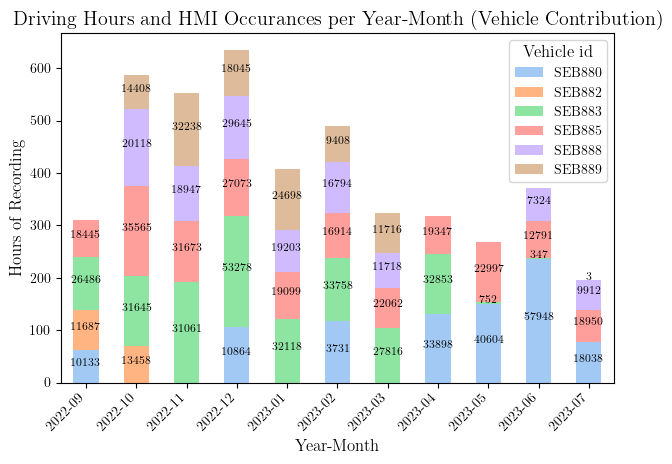

In [8]:
# Pivot the data for plotting
pivot_hour = grouped_hour.pivot(index='year_month', columns='vehicle', values='hours')
pivot_interactions = grouped_hmi.pivot(index='year_month', columns='vehicle', values='count')

# delete month not in campaign
pivot_hour.fillna(0, inplace=True)
pivot_interactions.fillna(0, inplace=True)
pivot_interactions = pivot_interactions.drop(pivot_interactions.index[0])
print(pivot_interactions)
#print(pivot_hour.iloc[0])

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,  # Adjust the font size for all elements
    "axes.labelsize": 12,  # Font size of axis labels
    "xtick.labelsize": 10,  # Font size of x-axis tick labels
    "ytick.labelsize": 10,  # Font size of y-axis tick labels
    "legend.fontsize": 10,  # Font size of legend
    "figure.titlesize": 14,  # Font size of figure title
})


# Use Seaborn's color palette for a nice set of colors
sns.set_palette("pastel")

# Plot the bar chart
plt.figure(figsize=(7, 3), dpi=500)
ax = pivot_hour.plot(kind='bar', stacked=True, linewidth=1.2)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Hours of Recording')
ax.set_title('Driving Hours and HMI Occurances per Year-Month (Vehicle Contribution)')
ax.legend(title='Vehicle id')
ax.set_xticklabels(pivot_hour.index, rotation=45, ha='right')


# Annotate bars with interaction counts for each vehicle
for i, date in enumerate(pivot_interactions.index):
    height = 0
    for j, value in enumerate(pivot_interactions.iloc[i]):
        value = int(value)
        if value == 0:
            continue
        hour = pivot_hour.iloc[i, j] 
        height += hour
        ax.annotate(f'{value}', (i, height - hour//2), ha='center', fontsize=8)
    

plt.tight_layout()
plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/hours_driving.pdf", format="pdf", bbox_inches="tight")
plt.show()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Same as above but with integrated data

In [14]:

dfMerged = dfMerged.reset_index()


10276864
10276864


In [68]:
df_hour = dfMerged.copy()
df_hmi = dfMerged.copy()

# Create a new column combining year and month
df_hour['year_month'] = df_hour['datetime'].dt.strftime('%Y-%m')
# print(len(df_hour[df_hour['year_month'] == "2023-01"]))
# sys.exit()
# Group by year-month and sum the hours
grouped_hour = df_hour.groupby(['year_month', 'vehicle']).size().reset_index(name='count')
grouped_hour['hours'] = grouped_hour['count'] // 3600

# Create a new column combining year and month
df_hmi = df_hmi[df_hmi.Label.notna()]
df_hmi['year_month'] = df_hmi['datetime'].dt.strftime('%Y-%m')
# Group by year-month and sum the hours
grouped_hmi = df_hmi.groupby(['year_month', 'vehicle']).size().reset_index(name='count')


In [78]:
#df_hmi[df_hmi['year_month']=="2022-09"]["Label"]
#grouped_hmi

vehicle     SEB880  SEB882  SEB883  SEB885  SEB888  SEB889
year_month                                                
2022-09       29.0    52.0   298.0    96.0     0.0     0.0
2022-10        0.0   108.0   397.0   202.0   298.0   178.0
2022-11        0.0     0.0   326.0   140.0   249.0   493.0
2022-12       97.0     0.0   486.0   100.0   323.0   163.0
2023-01        0.0     0.0   253.0    42.0   306.0   250.0
2023-02       29.0     0.0   380.0    84.0   243.0   100.0
2023-03        0.0     0.0   281.0    27.0   116.0   165.0
2023-04      304.0     0.0   279.0    66.0     0.0     0.0
2023-05      297.0     0.0    11.0    48.0     0.0     0.0
2023-06      468.0     0.0     5.0    57.0    91.0     0.0
2023-07       96.0     0.0     0.0    66.0    98.0     0.0


<Figure size 3500x1500 with 0 Axes>

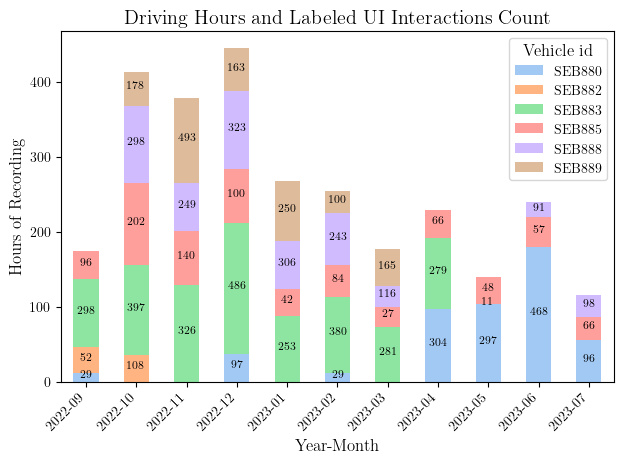

In [82]:
# Pivot the data for plotting
pivot_hour = grouped_hour.pivot(index='year_month', columns='vehicle', values='hours')
pivot_interactions = grouped_hmi.pivot(index='year_month', columns='vehicle', values='count')


# delete month not in campaign
pivot_hour.fillna(0, inplace=True)
pivot_interactions.fillna(0, inplace=True)
#pivot_interactions = pivot_interactions.drop(pivot_interactions.index[0])
#print(pivot_hour)
print(pivot_interactions)
#print(pivot_hour.iloc[0])

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,  # Adjust the font size for all elements
    "axes.labelsize": 12,  # Font size of axis labels
    "xtick.labelsize": 10,  # Font size of x-axis tick labels
    "ytick.labelsize": 10,  # Font size of y-axis tick labels
    "legend.fontsize": 10,  # Font size of legend
    "figure.titlesize": 14,  # Font size of figure title
})


# Use Seaborn's color palette for a nice set of colors
sns.set_palette("pastel")

# Plot the bar chart
plt.figure(figsize=(7, 3), dpi=500)
ax = pivot_hour.plot(kind='bar', stacked=True, linewidth=1.2)
ax.set_xlabel('Year-Month')
ax.set_ylabel('Hours of Recording')
ax.set_title('Driving Hours and Labeled UI Interactions Count')
ax.legend(title='Vehicle id')
ax.set_xticklabels(pivot_hour.index, rotation=45, ha='right')


# Annotate bars with interaction counts for each vehicle
for i, date in enumerate(pivot_interactions.index):
    height = 0
   
    for j, value in enumerate(pivot_interactions.iloc[i]):
        value = int(value)
        hour = pivot_hour.iloc[i, j] 
        height += hour
        if hour == 0:
            continue
        ax.annotate(f'{value}', (i, height - hour//2), ha='center', fontsize=8)
    

plt.tight_layout()
plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/hours_labels.pdf", format="pdf", bbox_inches="tight")
plt.show()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Statistics on integrated data

In [84]:
# Get num hours, num hmi, and driving sessions
print("Num driving sessions: ", len(dfMerged.session.unique()))
print("Num hours mf4: ", len(dfMerged)//3600)
print("Num interactions: ", (dfMerged.Label.notna().sum()))
print(dfMerged.datetime.max())
dfMerged.keys()

Num driving sessions:  1716
Num hours mf4:  2854
Num interactions:  8197
2023-07-25 07:44:06


Index(['level_0', 'index', 'avg_irradiation', 'steering_speed',
       'temperature_out', 'hour', 'month', 'odometer', 'light_sensor_rear',
       'light_sensor_front', 'temperature_in', 'KBI_speed', 'soc', 'ESP_speed',
       'latitude', 'longitude', 'seatbelt_codriver', 'seatbelt_rear_l',
       'seatbelt_rear_m', 'seatbelt_rear_r', 'CHA_ESP_drive_mode',
       'CHA_MO_drive_mode', 'rain_sensor', 'street_category', 'kickdown',
       'altitude', 'driving_program', 'datetime', 'session', 'Label', 'ID',
       'FunctionValue', 'domain', 'BeginTime', 'time_second',
       'distance_driven', 'ts_normalized', 'weekday', 'vehicle'],
      dtype='object')

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Labeled UI Interactions (EsoTrace) over CAN Signal Coverage (MF4)

In [35]:
x_lim_min = min(dfMf4.datetime) 
x_lim_max =  max(dfMf4.datetime)

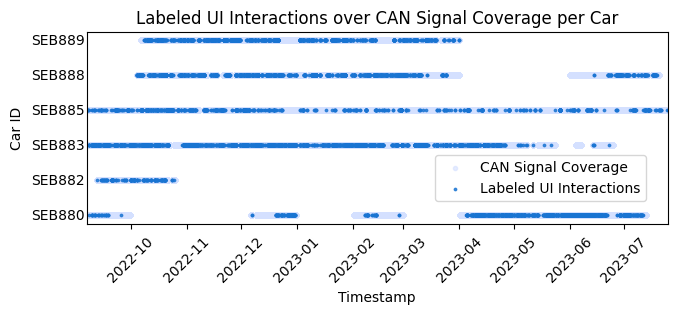

In [58]:
plt.figure(figsize=(7.5, 2.5))

signal_color = '#1974d2'   # Color for signal flags
scatter_color = '#d4e0ff'  # Color for df_all scatter plot

#signal_color = '#fb6f92'
#scatter_color = '#ffe5ec'

vehicle_names = ["SEB880", "SEB882", "SEB883", "SEB885", "SEB888", "SEB889"]
#vehicle_names = ["SEB882"] #"SEB880", 

for i, vehicle in enumerate(vehicle_names):
    df_all = dfMf4Dic[vehicle].copy()
    df_interaction = dfMergedDic[vehicle].copy()
    timestamps_all = pd.to_datetime(df_all['datetime'])
    timestamps_int = pd.to_datetime(df_interaction['datetime'])
    y = [i] * len(timestamps_all)

    signal_flags = df_interaction["Label"].notna()
    #signal_flags = (df_interaction["Label"].notna()) & (~df_interaction['Label'].str.contains('drive_mode'))

    # Filter timestamps and y based on signal_flags
    timestamps_filtered = timestamps_int[signal_flags]
    y_filtered = [y_val for flag, y_val in zip(signal_flags, y) if flag]
    
    if i == 0:
        plt.scatter(timestamps_all, y, s=9, color=scatter_color, alpha=0.6, label="CAN Signal Coverage")  # Light-colored scatter plot
        plt.scatter(timestamps_filtered, y_filtered, s=3, color=signal_color, alpha=0.8, label="Labeled UI Interactions")
    else:
        plt.scatter(timestamps_all, y, s=9, color=scatter_color, alpha=0.6)  # Light-colored scatter plot
        plt.scatter(timestamps_filtered, y_filtered, s=3, color=signal_color, alpha=0.8)

    # plt.scatter(timestamps_filtered, y_filtered, s=6)
    plt.yticks([])
    plt.xlim(x_lim_min, x_lim_max)
    plt.text(x_lim_min - pd.Timedelta(seconds=100000), y[i], vehicle, ha='right', va='center')


plt.legend(loc=(0.6, 0.12)) # 0.7 0.16
plt.xlabel('Timestamp')
plt.ylabel('Car ID', labelpad=45)
plt.title('Labeled UI Interactions over CAN Signal Coverage per Car')
plt.xticks(rotation=45)
#plt.savefig(f'../images/Labeled:interaction_over_mf4.pdf', bbox_inches='tight')
plt.show()


# Label distribution 


In [190]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


df= dfMerged[["domain", "Label"]].copy()
df = df[df.domain.notna()]
#df_sb
count = df.Label.value_counts()
df_sb = pd.DataFrame()
df_sb["domain"] = count.index.str.split('/').str[0]
df_sb["sub_domain"] = 
df_sb["label"] = count.index.str.split('/').str[-1]
df_sb["count"] = np.log1p(count.values)
df_sb

fig = px.sunburst(
    df_sb,
    path=['domain', 'label'],  # Define the hierarchical path
    values='count',  # Define the values to be represented by the size of segments
    title='Sunburst Chart of Label Domains and Labels'
)

# Customize font size conditionally
segment_sizes = df_sb.groupby(['domain', 'label'])['count'].sum().reset_index()
segment_sizes['font_size'] = segment_sizes['count'].apply(lambda x: 16 if x >= 15 else 10)

fig.update_traces(
    textfont=dict(size=segment_sizes['font_size'])
)

fig.write_html('sunburst_chart.html')


#plt.show()
#fig.show()

In [ ]:
# Determine segments to explode
explode_segments = df_sb['count'] < 10  # Change the threshold as needed

# Create a custom trace for exploded segments
exploded_trace = px.sunburst(
    df_sb[explode_segments],
    path=['domain', 'label'],  # Define the hierarchical path
    values='count',  # Define the values to be represented by the size of segments
    title='Sunburst Chart of Label Domains and Labels (Exploded)',
    hoverinfo='label+value+percent entry+percent root+count+domain'
).update_traces(textfont_size=16)

# Add the exploded trace to the original figure
fig.add_trace(exploded_trace.data[0])

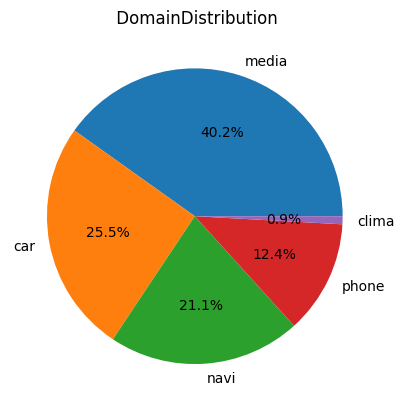

In [12]:
# Domain
domain = dfMerged["domain"].copy()

distribution = domain.value_counts()
count = distribution.values
category = distribution.index
plt.pie(count, labels=category, autopct='%1.1f%%')
plt.title(f' DomainDistribution')
plt.show()

In [51]:
Label = dfMerged["Label"].copy()
print(Label.value_counts())

Label
media/selectedSource/Radio        733
media/selectedSource/Bluetooth    200
navi/Start                        115
media/selectedSource/Favorite     111
navi/Favorite_or_Person            73
car/drive_mode/0.0                 26
clima/AC/off                       17
phone/StartAndroidAuto             12
phone/goToFavorite                 11
car/drive_mode/3.0                 10
car/drive_mode/1.0                  5
car/ESS/on                          2
car/drive_mode/2.0                  1
clima/AC/on                         1
car/charismaLevel/Lift              1
car/charismaLevel/Abgesenkt         1
phone/StartCarPlay                  1
Name: count, dtype: int64


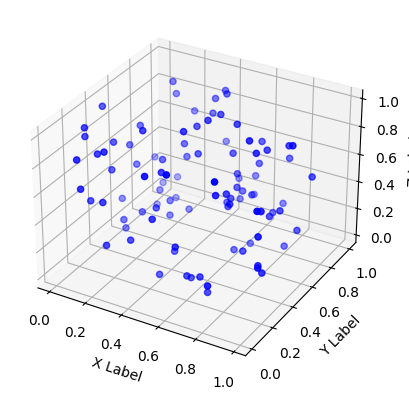

In [4]:
np.random.seed(0)
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
z = np.random.rand(num_points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()